# CMS Event Data Classification 

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from functools import reduce

%matplotlib inline

In [2]:
# Hiding warnings
import warnings
warnings.filterwarnings('ignore')

### Importing the data

In [3]:
data = pd.read_csv("output_data/ElectronRegionData.csv") # Electron Region

In [4]:
# View the merged data head
data.head()

,event,eta,phi,et,position,electron,tau
0,0,0,0,12.15180,9,0,0
1,0,0,1,10.19040,5,0,0
2,0,0,2,7.06514,6,0,0
3,0,0,3,6.87023,14,0,0
4,0,0,4,5.66144,1,0,0


**Data Dictionary**

- event: Event number (Integer)
- eta: Index of eta coordinate 0-13 (Integer)
- phi: Index of phi coordinate, 0-17, which is also specifies the optical link (Integer)
- et: Transverse energy deposited in the region (Float)
- position: Position of the cluster within the region, a 4-bit number (Integer)
- electron: Electron bit signifying that the region likely has an electron or photon deposit (Bool)
- tau: Tau bit signifying that the region likely has a tau deposit (Bool)

In [5]:
# Check the shape of the merged dataframe
data.shape

(64512, 7)

Check for null values.

In [6]:
data.isnull().sum()

event       0
eta         0
phi         0
et          0
position    0
electron    0
tau         0
dtype: int64

There are no null values in the data.

### Exploratory Data Analysis (EDA)

We are performing EDA on the mock data for CMS Experiment.

Plotting the et values for each dataset (each region).

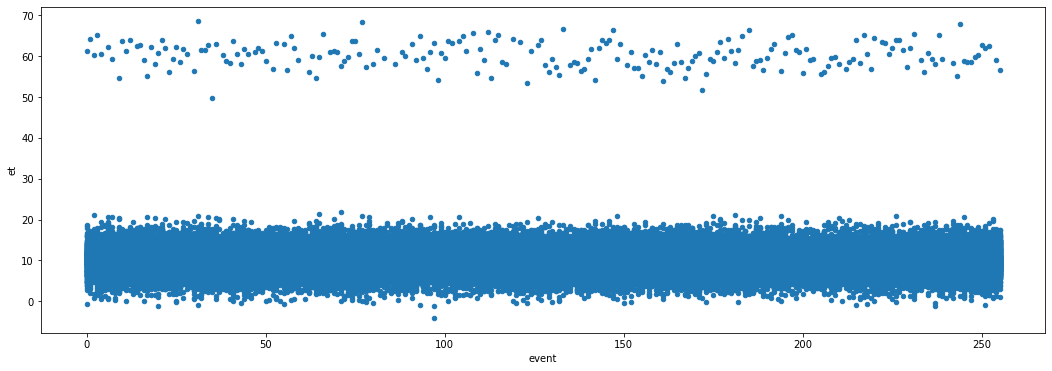

In [13]:
# Electron region data
data_elec.plot.scatter(x='event', y = 'et', figsize = (18,6))

We can see that the dataset has segmented values of 'et' with most values segmented in lower bottom when plotted visually.

### Plotting the values onto a matrix

We are using the electron region data for the 0th event.

In [7]:
event_data = data.loc[data['event'] == 0]

In [8]:
event_data.head()

,event,eta,phi,et,position,electron,tau
0,0,0,0,12.15180,9,0,0
1,0,0,1,10.19040,5,0,0
2,0,0,2,7.06514,6,0,0
3,0,0,3,6.87023,14,0,0
4,0,0,4,5.66144,1,0,0


In [9]:
# Convert the series into a 14x18 matrix
x_elec = np.array(event_data['electron'])
matrix_electron = np.asmatrix(x_elec)

# Resizing into size 14x18
matrix_electron.resize((14, 18))

Plotting the values of matrix on 2D plot

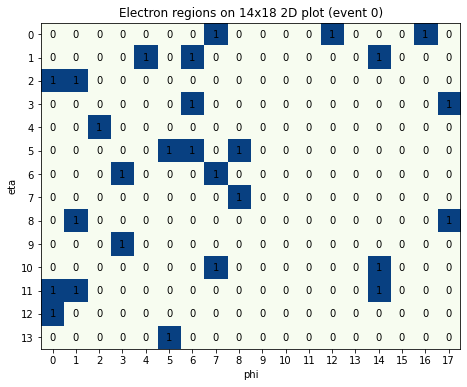

In [10]:
fig, ax = plt.subplots(figsize = (18, 6))
mat = ax.imshow(matrix_electron, cmap='GnBu', interpolation='nearest')

# Set attributes
plt.ylabel("eta")
plt.xlabel("phi")
plt.yticks(range(matrix_electron.shape[0]))
plt.xticks(range(matrix_electron.shape[1]))
plt.title('Electron regions on 14x18 2D plot (event 0)')

# this places 0 or 1 centered in the individual squares
for x in range(matrix_electron.shape[0]):
    for y in range(matrix_electron.shape[1]):
        ax.annotate(str(matrix_electron[x, y])[0], xy=(y, x), 
                    horizontalalignment='center', verticalalignment='center')
plt.show()

### ET values

In [11]:
# Convert the series into a 14x18 matrix
x_et = np.array(event_data['et'])
matrix_et = np.asmatrix(x_et)

# Resizing into size 14x18
matrix_et.resize((14, 18))

**Plot the 2-D matrix**

Text(0.5, 1.0, 'ET values on a 14x18 2-D plot')

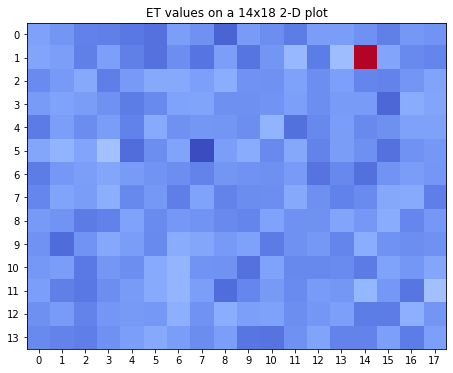

In [13]:
plt.figure(figsize=(18,6))
plt.imshow(matrix_et, cmap=plt.cm.coolwarm)
plt.yticks(range(matrix_et.shape[0]))
plt.xticks(range(matrix_et.shape[1]));
plt.title("ET values on a 14x18 2-D plot")

---

### Principal Component Analysis (PCA)

Before performing PCA, the data needs to be scaled.

In [15]:
# Numerical features
numerical_feats = ['eta', 'phi', 'et', 'position', 'electron', 'tau']

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# We are taking data for first event in our dataframe
df = event_data[numerical_feats]

# Fitting the standard scaler to our data
df = StandardScaler().fit_transform(df)

# Converting the scaled data into a dataframe
df_scaled = pd.DataFrame(df)

In [17]:
# Initializing PCA
pca = PCA()

In [18]:
# Fitting the model to the data
principalComponents = pca.fit_transform(df_scaled)

In [19]:
# Getting the data as a dataframe
principalDf = pd.DataFrame(data = principalComponents)

# View the first five rows of dataframe
principalDf.head()

,0,1,2,3,4,5
0,0.865419,-0.460947,-0.981266,-0.528155,-1.345568,1.482738
1,0.585516,-1.004025,-1.264000,-0.793941,-0.776099,1.229656
2,0.126720,-1.075021,-1.399682,-0.857747,-1.064850,0.711741
3,0.002866,-0.024841,-1.092014,-0.549681,-2.223757,0.421153
4,-0.127361,-1.553162,-1.709352,-1.205262,-0.207039,0.468701


### Feature relationships

Plotting the data distribution between different experiment data for the event 0.

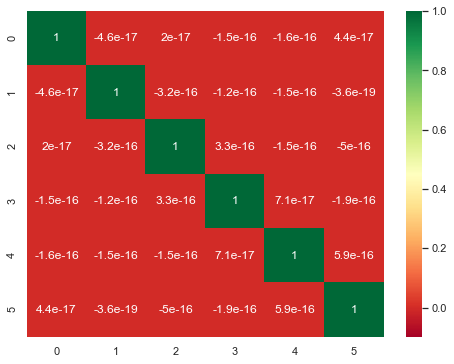

In [20]:
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
sns.heatmap(principalDf.corr(method='pearson'), vmin=-.1, vmax=1,  annot=True, cmap='RdYlGn')
plt.show()

### Model building 


### K-Means Clustering

We will now apply K-Means Clustering to the dataframe that we generated using PCA.

In [21]:
from sklearn.cluster import KMeans

In [22]:
data = principalDf

#### For 2 clusters

In [23]:
# Initializing the model
kmean = KMeans(n_clusters=2)

In [24]:
# FItting the model to the data
kmean.fit(data)

KMeans(n_clusters=2)

Print the value of centroids.

In [25]:
centroids = kmean.cluster_centers_
print(centroids)

[[ 2.42158354 -0.25477332 -0.48632856  0.83361049  0.12553582 -1.35363564]
 [-0.29059003  0.0305728   0.05835943 -0.10003326 -0.0150643   0.16243628]]


Predict and cluster the data into two label groups (0, 1).

In [26]:
data['Label'] = kmean.predict(data)

Plotting the value counts of our predicted labels.

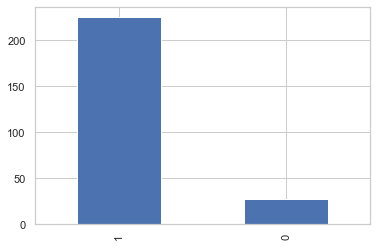

In [27]:
data['Label'].value_counts().plot(kind = 'bar');

In [28]:
# Convert the series into a 14x18 matrix
x_label = np.array(data['Label'])
matrix_label = np.asmatrix(x_label)

In [29]:
# Resizing into size 14x18
matrix_label.resize((14, 18))

Plotting the values onto a 14x18 matrix.

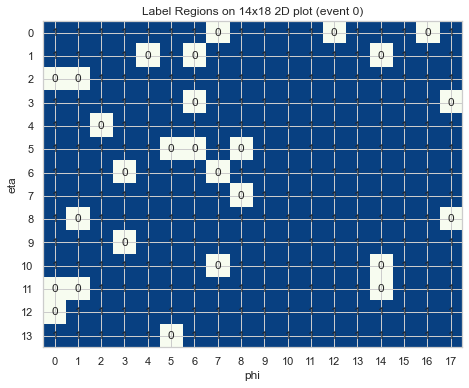

In [30]:
fig, ax = plt.subplots(figsize = (18, 6))
mat = ax.imshow(matrix_label, cmap='GnBu', interpolation='nearest')

# Set attributes
plt.ylabel("eta")
plt.xlabel("phi")
plt.yticks(range(matrix_label.shape[0]))
plt.xticks(range(matrix_label.shape[1]))
plt.title('Label Regions on 14x18 2D plot (event 0)')

# this places 0 or 1 centered in the individual squares
for x in range(matrix_label.shape[0]):
    for y in range(matrix_label.shape[1]):
        ax.annotate(str(matrix_label[x, y])[0], xy=(y, x), 
                    horizontalalignment='center', verticalalignment='center')
plt.show()


**Plotting the data clusters based on the predicted labels.**

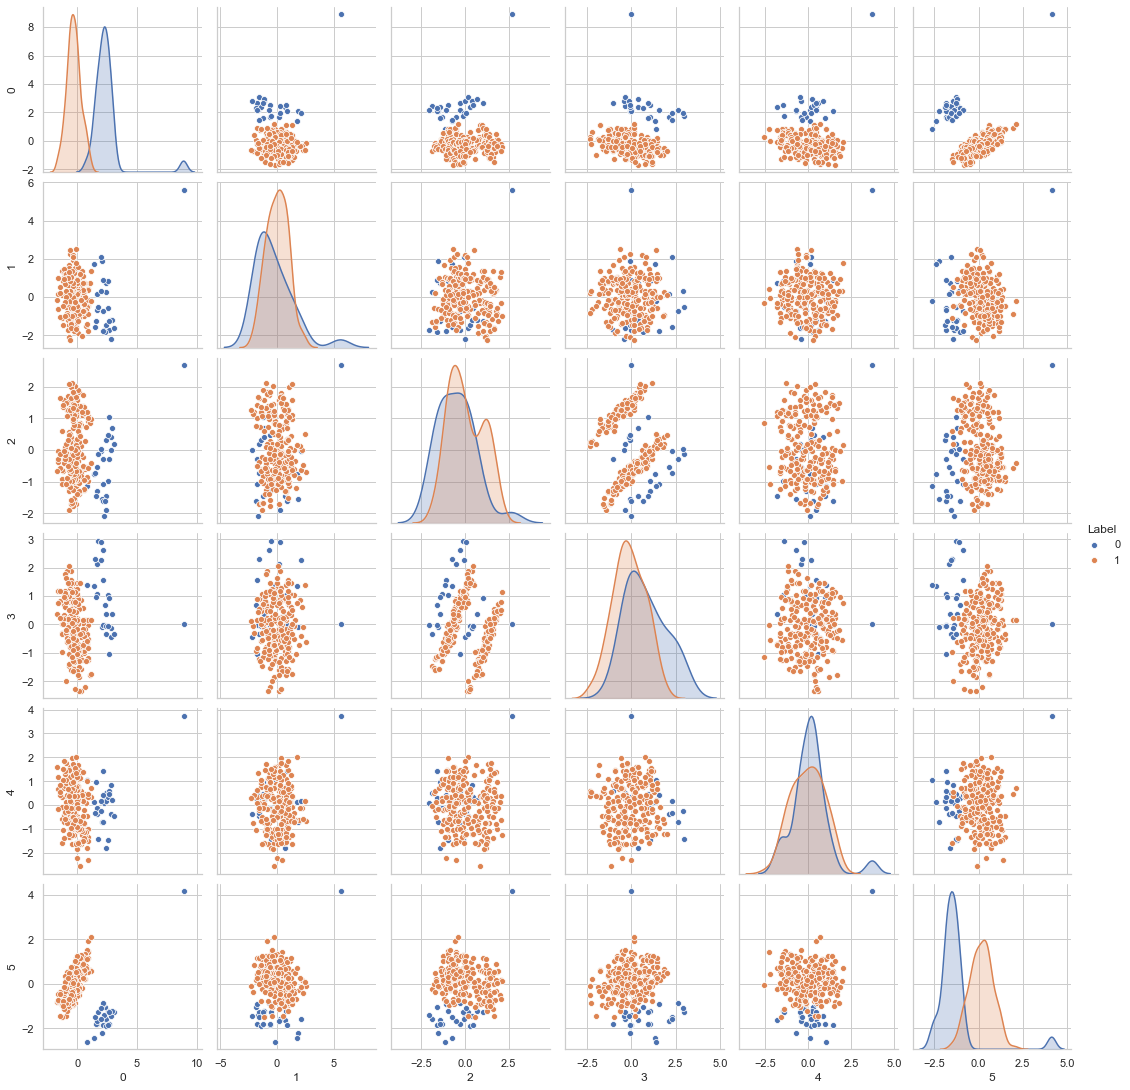

In [31]:
sns.pairplot(data, hue='Label')

#### For 3 clusters

In [32]:
# Initializing the model
kmean = KMeans(n_clusters=3)

In [33]:
# FItting the model to the data
kmean.fit(data)

KMeans(n_clusters=3)

Print the value of centroids.

In [34]:
centroids = kmean.cluster_centers_
print(centroids)

[[ 2.42158354e+00 -2.54773316e-01 -4.86328557e-01  8.33610488e-01
   1.25535824e-01 -1.35363564e+00  3.33066907e-16]
 [-1.32988925e-01 -2.31218423e-01  1.19720286e+00 -6.26154778e-01
  -8.21771680e-02 -1.85577906e-01  1.00000000e+00]
 [-3.79240644e-01  1.77830360e-01 -5.82240007e-01  1.95910096e-01
   2.26866899e-02  3.58194256e-01  1.00000000e+00]]


Predict and cluster the data into two label groups (0, 1).

In [35]:
data['Label_3segment'] = kmean.predict(data)

Plotting the value counts of our predicted labels.

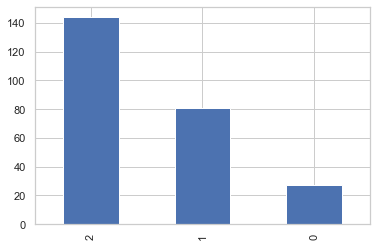

In [36]:
data['Label_3segment'].value_counts().plot(kind = 'bar');

In [37]:
# Convert the series into a 14x18 matrix
x_label = np.array(data['Label_3segment'])
matrix_label = np.asmatrix(x_label)

In [38]:
# Resizing into size 14x18
matrix_label.resize((14, 18))

Plotting the values onto a 14x18 matrix.

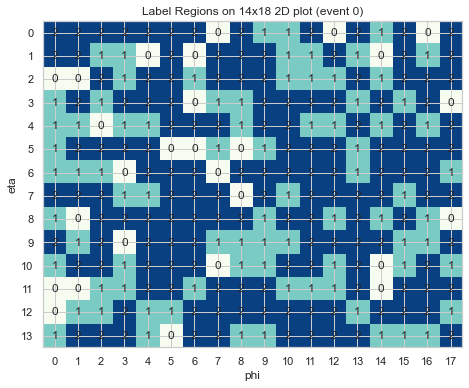

In [39]:
fig, ax = plt.subplots(figsize = (18, 6))
mat = ax.imshow(matrix_label, cmap='GnBu', interpolation='nearest')

# Set attributes
plt.ylabel("eta")
plt.xlabel("phi")
plt.yticks(range(matrix_label.shape[0]))
plt.xticks(range(matrix_label.shape[1]))
plt.title('Label Regions on 14x18 2D plot (event 0)')

# this places 0 or 1 centered in the individual squares
for x in range(matrix_label.shape[0]):
    for y in range(matrix_label.shape[1]):
        ax.annotate(str(matrix_label[x, y])[0], xy=(y, x), 
                    horizontalalignment='center', verticalalignment='center')
plt.show()


**Plotting the data clusters based on the predicted labels.**

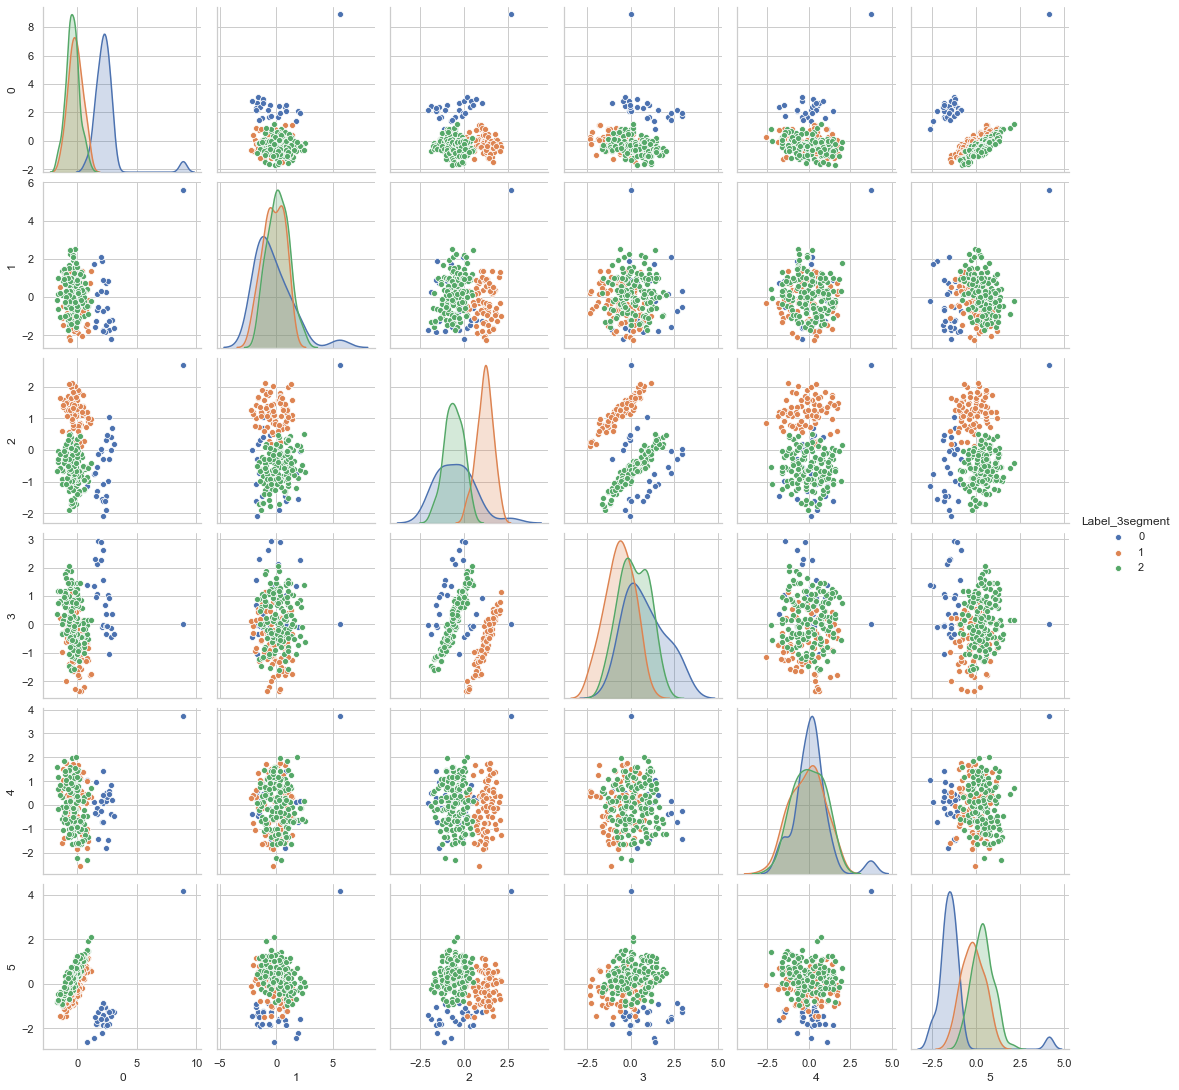

In [40]:
sns.pairplot(data.drop(['Label'], axis =1), hue='Label_3segment')

### Agglomerative Clustering

In [41]:
from sklearn.cluster import AgglomerativeClustering

#### For 2 clusters

In [42]:
# We can tell it how many clusters we're aiming for
agg_clust = AgglomerativeClustering(n_clusters=2)

# Using scaled dataframe
assigned_clusters = agg_clust.fit_predict(df_scaled)

In [43]:
data['AggLabel'] = assigned_clusters

In [44]:
# Convert the series into a 14x18 matrix
x_label = np.array(data['AggLabel'])
matrix_label = np.asmatrix(x_label)

In [45]:
# Resizing into size 14x18
matrix_label.resize((14, 18))

Plotting the values onto a 14x18 matrix.

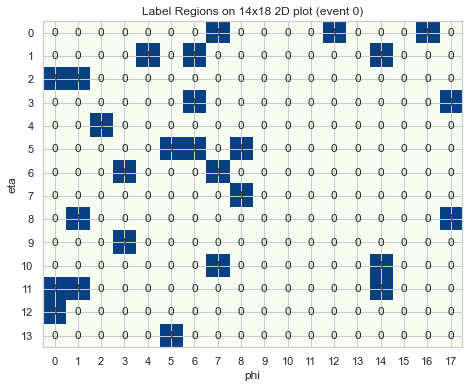

In [46]:
fig, ax = plt.subplots(figsize = (18, 6))
mat = ax.imshow(matrix_label, cmap='GnBu', interpolation='nearest')

# Set attributes
plt.ylabel("eta")
plt.xlabel("phi")
plt.yticks(range(matrix_label.shape[0]))
plt.xticks(range(matrix_label.shape[1]))
plt.title('Label Regions on 14x18 2D plot (event 0)')

# this places 0 or 1 centered in the individual squares
for x in range(matrix_label.shape[0]):
    for y in range(matrix_label.shape[1]):
        ax.annotate(str(matrix_label[x, y])[0], xy=(y, x), 
                    horizontalalignment='center', verticalalignment='center')
plt.show()


**Plotting the data clusters based on the predicted labels.**

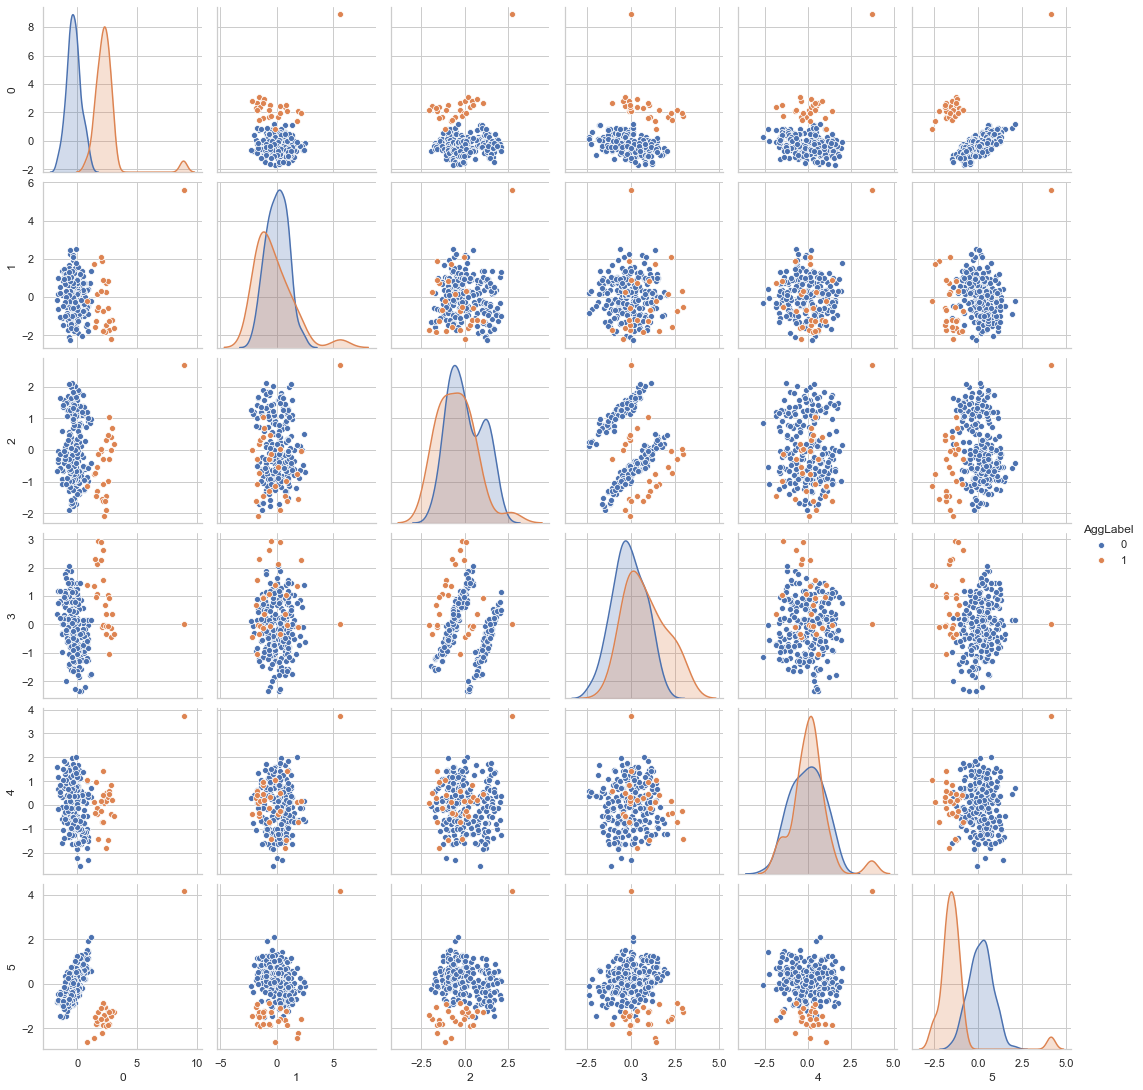

In [47]:
sns.pairplot(data.drop(['Label', 'Label_3segment'], axis =1), hue='AggLabel')

#### For 3 clusters

In [48]:
# We can tell it how many clusters we're aiming for
agg_clust = AgglomerativeClustering(n_clusters=3)

# Using scaled dataframe
assigned_clusters = agg_clust.fit_predict(df_scaled)

In [49]:
data['AggLabel_3segment'] = assigned_clusters

In [50]:
# Convert the series into a 14x18 matrix
x_label = np.array(data['AggLabel_3segment'])
matrix_label = np.asmatrix(x_label)

In [51]:
# Resizing into size 14x18
matrix_label.resize((14, 18))

Plotting the values onto a 14x18 matrix.

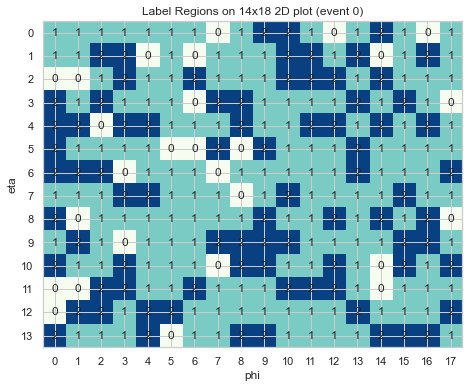

In [52]:
fig, ax = plt.subplots(figsize = (18, 6))
mat = ax.imshow(matrix_label, cmap='GnBu', interpolation='nearest')

# Set attributes
plt.ylabel("eta")
plt.xlabel("phi")
plt.yticks(range(matrix_label.shape[0]))
plt.xticks(range(matrix_label.shape[1]))
plt.title('Label Regions on 14x18 2D plot (event 0)')

# this places 0 or 1 centered in the individual squares
for x in range(matrix_label.shape[0]):
    for y in range(matrix_label.shape[1]):
        ax.annotate(str(matrix_label[x, y])[0], xy=(y, x), 
                    horizontalalignment='center', verticalalignment='center')
plt.show()


**Plotting the data clusters based on the predicted labels.**

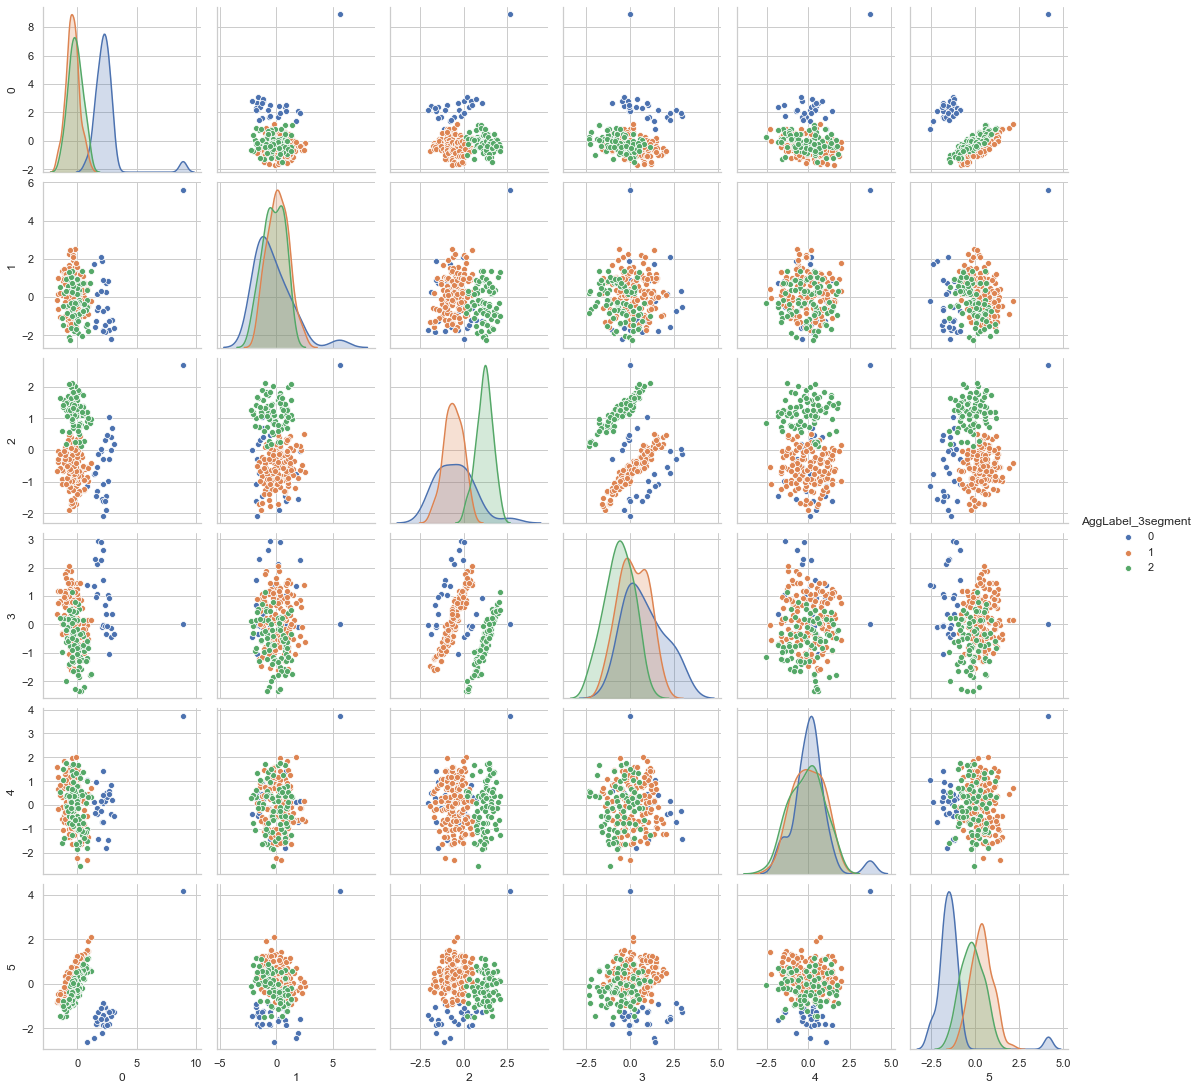

In [53]:
sns.pairplot(data.drop(['Label', 'Label_3segment', 'AggLabel'], axis=1), hue='AggLabel_3segment')